In [17]:
from datetime import datetime, timedelta
import pandas as pd
import numpy as np


In [18]:
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### We only want the data for condominums and apartments, so we filter the rest out

In [19]:
df = pd.read_csv('data/total_transactions.csv')
# df['property_type'].unique()
df = df[df['property_type'].isin(['Executive Condominium', 'Apartment', 'Condominium'])]


### Cleaning up of data
We want to filter out the data that has lease commencing before 2000. We will also be keeping data that is considered to be freehold

In [20]:
filter_year = 2000
df['reference_period'] = pd.to_datetime(df['reference_period'])

df = df[~(df['tenure'] == '-')]

freehold_df = df[df['tenure'].str.contains('hold')]
filtered_df = df[~df['tenure'].str.contains('hold')]
filtered_df['tenure'] = filtered_df['tenure'].apply(lambda x: int(x[-4:]))

filtered_df = filtered_df[(filtered_df['tenure'] > filter_year)]
combined_df = pd.concat([filtered_df, freehold_df])
combined_df

<ipython-input-20-5c50e7c4ef83>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['tenure'] = filtered_df['tenure'].apply(lambda x: int(x[-4:]))


,y,x,street,project,market_segment,area_sqm,area_sqft,price,nett_price,unit_price_psm,unit_price_psf,floor_range,num_units,reference_period,type_of_sale,property_type,district,type_of_area,tenure,observation_time
3,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,348.0,3745.840826,4400000.0,NaN,12643.678161,1174.636138,06-10,1,2018-09-30,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
4,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,224.0,2411.115934,3600000.0,NaN,16071.428571,1493.084571,01-05,1,2018-03-31,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
5,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,226.0,2432.643755,3450000.0,NaN,15265.486726,1418.210123,01-05,1,2019-02-28,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
6,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,223.0,2400.352024,3580000.0,NaN,16053.811659,1491.447906,01-05,1,2018-01-31,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
7,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,224.0,2411.115934,3700000.0,NaN,16517.857143,1534.559142,01-05,1,2017-11-30,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81367,40335.554351,31392.747138,NIM ROAD,NIM GARDENS,OCR,170.0,1829.864771,1535000.0,NaN,9029.411765,838.859802,01-05,1,2020-08-31,Resale,Condominium,28,Strata,Freehold,2020-10-11 22:16:28.732284
81370,40355.375975,27334.122160,UPPER THOMSON ROAD,MEADOWS @ PEIRCE,OCR,208.0,2238.893367,1830000.0,NaN,8798.076923,817.368092,01-05,1,2020-09-30,Resale,Condominium,26,Strata,Freehold,2020-10-11 22:16:28.732284
81399,37249.766857,19916.154130,HILLVIEW AVENUE,THE PETALS,OCR,97.0,1044.099311,1000000.0,NaN,10309.278351,957.763299,01-05,1,2020-09-30,Resale,Condominium,23,Strata,Freehold,2020-10-11 22:16:28.732284
81414,36483.480849,20460.712871,BUKIT BATOK EAST AVENUE 6,PARK NATURA,RCR,215.0,2314.240740,2400000.0,NaN,11162.790698,1037.057190,01-05,1,2020-09-30,Resale,Condominium,23,Strata,Freehold,2020-10-11 22:16:28.732284


In [21]:
combined_df.sort_values('reference_period')

,y,x,street,project,market_segment,area_sqm,area_sqft,price,nett_price,unit_price_psm,unit_price_psf,floor_range,num_units,reference_period,type_of_sale,property_type,district,type_of_area,tenure,observation_time
61601,39909.724700,18804.129300,CHOA CHU KANG GROVE,SOL ACRES,OCR,97.0,1044.099311,853000.0,NaN,8793.814433,816.972094,16-20,1,2017-04-30,New Sale,Executive Condominium,23,Strata,2014,2020-04-11 15:24:53.293101
35326,NaN,NaN,SIGLAP LINK,SEASIDE RESIDENCES,OCR,77.0,828.821102,1548360.0,NaN,20108.571429,1868.147415,21-25,1,2017-04-30,New Sale,Apartment,15,Strata,2016,2020-04-11 15:24:53.293101
26324,33007.936070,27303.196302,BALMORAL PARK,THE SOLITAIRE,CCR,244.0,2626.394142,3680000.0,NaN,15081.967213,1401.160603,11-15,1,2017-04-30,Resale,Condominium,10,Strata,Freehold,2020-04-11 15:24:53.293101
35325,NaN,NaN,SIGLAP LINK,SEASIDE RESIDENCES,OCR,73.0,785.765461,1518000.0,NaN,20794.520548,1931.874174,16-20,1,2017-04-30,New Sale,Apartment,15,Strata,2016,2020-04-11 15:24:53.293101
35324,NaN,NaN,SIGLAP LINK,SEASIDE RESIDENCES,OCR,77.0,828.821102,1360000.0,NaN,17662.337662,1640.884862,06-10,1,2017-04-30,New Sale,Apartment,15,Strata,2016,2020-04-11 15:24:53.293101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78905,NaN,NaN,SERANGOON NORTH VIEW,THE GARDEN RESIDENCES,OCR,64.0,688.890267,1178100.0,NaN,18407.812500,1710.141740,11-15,1,2020-09-30,New Sale,Apartment,19,Strata,2017,2020-09-11 22:16:21.907299
78906,NaN,NaN,SERANGOON NORTH VIEW,THE GARDEN RESIDENCES,OCR,64.0,688.890267,1038600.0,NaN,16228.125000,1507.642146,01-05,1,2020-09-30,New Sale,Apartment,19,Strata,2017,2020-09-11 22:16:21.907299
78907,NaN,NaN,SERANGOON NORTH VIEW,THE GARDEN RESIDENCES,OCR,42.0,452.084238,763100.0,NaN,18169.047619,1687.959757,11-15,1,2020-09-30,New Sale,Apartment,19,Strata,2017,2020-09-11 22:16:21.907299
78863,NaN,NaN,TOH TUCK ROAD,DAINTREE RESIDENCE,RCR,71.0,764.237640,1308000.0,NaN,18422.535211,1711.509525,01-05,1,2020-09-30,New Sale,Condominium,21,Strata,2017,2020-09-11 22:16:21.907299


### Grouping data by postal district

In [5]:
mean_df = combined_df.groupby(['district', 'reference_period'])['unit_price_psf'].mean().unstack(level=0)
mean_df.index


DatetimeIndex(['2017-04-30', '2017-05-31', '2017-06-30', '2017-07-31',
               '2017-08-31', '2017-09-30', '2017-10-31', '2017-11-30',
               '2017-12-31', '2018-01-31', '2018-02-28', '2018-03-31',
               '2018-04-30', '2018-05-31', '2018-06-30', '2018-07-31',
               '2018-08-31', '2018-09-30', '2018-10-31', '2018-11-30',
               '2018-12-31', '2019-01-31', '2019-02-28', '2019-03-31',
               '2019-04-30', '2019-05-31', '2019-06-30', '2019-07-31',
               '2019-08-31', '2019-09-30', '2019-10-31', '2019-11-30',
               '2019-12-31', '2020-01-31', '2020-02-29', '2020-03-31',
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30'],
              dtype='datetime64[ns]', name='reference_period', freq=None)

<AxesSubplot:xlabel='reference_period'>

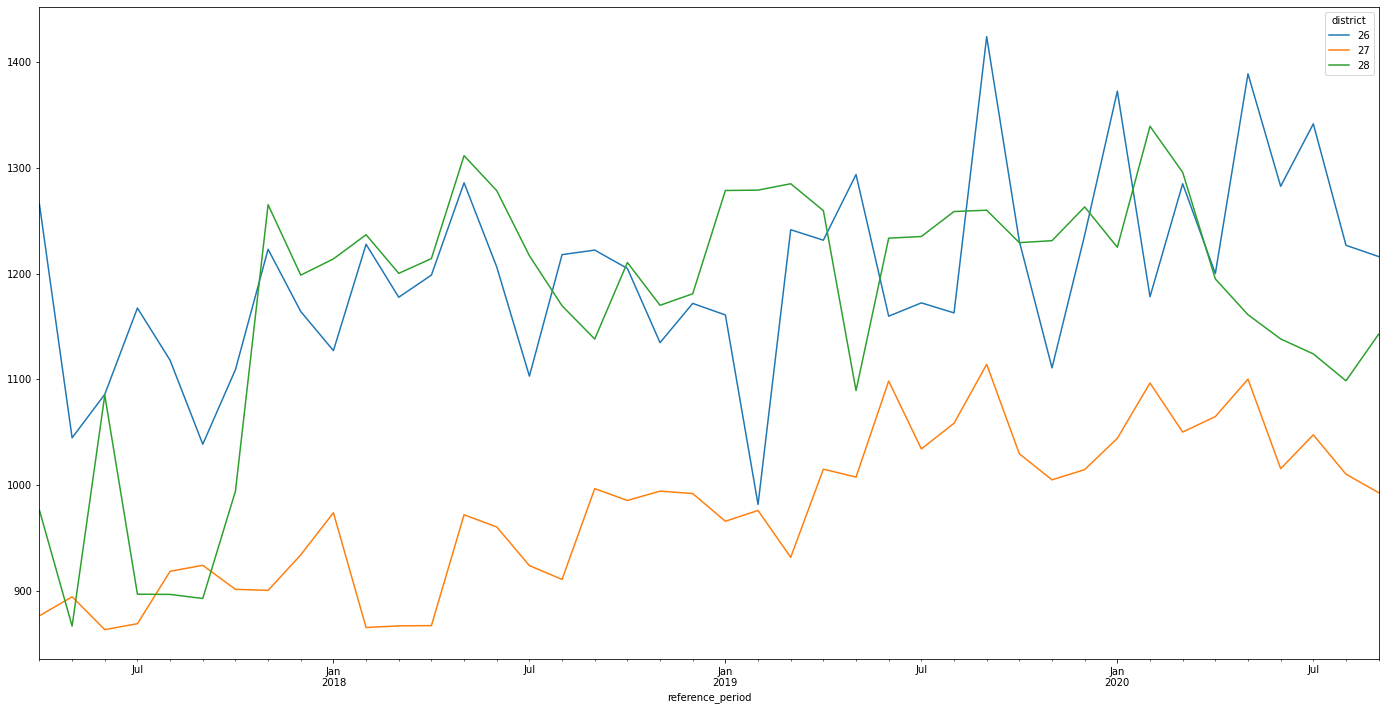

In [6]:
mean_df.plot(figsize=(24,12), y=[26,27,28])

In [9]:
project = 'MIDWOOD'
interest_df = combined_df[(combined_df['project'].str.contains(project))].sort_values('reference_period', ascending=False)
print(list(interest_df['project'].unique()))
interest_df[['unit_price_psf', 'area_sqft', 'reference_period', 'type_of_sale']]

['MIDWOOD']


,unit_price_psf,area_sqft,reference_period,type_of_sale
63009,1625.803200,990.279759,2020-03-31,New Sale
63013,1562.835584,484.375969,2020-02-29,New Sale
63014,1576.806391,785.765461,2020-02-29,New Sale
63024,1634.222538,688.890267,2020-02-29,New Sale
63027,1728.867509,688.890267,2020-02-29,New Sale
63021,1535.171123,484.375969,2020-01-31,New Sale
63010,1721.620845,548.959431,2020-01-31,New Sale
63029,1651.932179,688.890267,2019-12-31,New Sale
63011,1579.351680,484.375969,2019-11-30,New Sale
63012,1650.395181,548.959431,2019-11-30,New Sale


In [10]:
list(interest_df['project'].unique())

['MIDWOOD']

In [14]:
min_sqft = 600
max_sqft = 900
filtered_interest_df = interest_df[(interest_df['area_sqft'] >= min_sqft) & 
                                   (interest_df['area_sqft'] <= max_sqft) &
                                   (interest_df['type_of_sale'] == 'New Sale')
                                  ].reset_index(drop=True)
print(len(filtered_interest_df))
print(filtered_interest_df['price'].mean())
print(list(filtered_interest_df['area_sqft'].unique()))
filtered_interest_df.sort_values('reference_period', ascending=False)

13
1208784.6153846155
[785.76546066, 688.89026688, 635.07071478, 893.40456486]


,y,x,street,project,market_segment,area_sqm,area_sqft,price,nett_price,unit_price_psm,unit_price_psf,floor_range,num_units,reference_period,type_of_sale,property_type,district,type_of_area,tenure,observation_time
0,NaN,NaN,HILLVIEW RISE,MIDWOOD,OCR,73.0,785.765461,1239000.0,NaN,16972.602740,1576.806391,06-10,1,2020-02-29,New Sale,Condominium,23,Strata,2018,2020-04-11 15:24:53.293101
1,NaN,NaN,HILLVIEW RISE,MIDWOOD,OCR,64.0,688.890267,1125800.0,NaN,17590.625000,1634.222538,06-10,1,2020-02-29,New Sale,Condominium,23,Strata,2018,2020-04-11 15:24:53.293101
2,NaN,NaN,HILLVIEW RISE,MIDWOOD,OCR,64.0,688.890267,1191000.0,NaN,18609.375000,1728.867509,21-25,1,2020-02-29,New Sale,Condominium,23,Strata,2018,2020-04-11 15:24:53.293101
3,NaN,NaN,HILLVIEW RISE,MIDWOOD,OCR,64.0,688.890267,1138000.0,NaN,17781.250000,1651.932179,11-15,1,2019-12-31,New Sale,Condominium,23,Strata,2018,2020-04-11 15:24:53.293101
4,NaN,NaN,HILLVIEW RISE,MIDWOOD,OCR,59.0,635.070715,985000.0,NaN,16694.915254,1551.008379,06-10,1,2019-11-30,New Sale,Condominium,23,Strata,2018,2020-04-11 15:24:53.293101
5,NaN,NaN,HILLVIEW RISE,MIDWOOD,OCR,83.0,893.404565,1474000.0,NaN,17759.036145,1649.868445,16-20,1,2019-11-30,New Sale,Condominium,23,Strata,2018,2020-04-11 15:24:53.293101
6,NaN,NaN,HILLVIEW RISE,MIDWOOD,OCR,64.0,688.890267,1176200.0,NaN,18378.125000,1707.383681,16-20,1,2019-10-31,New Sale,Condominium,23,Strata,2018,2020-04-11 15:24:53.293101
7,NaN,NaN,HILLVIEW RISE,MIDWOOD,OCR,73.0,785.765461,1283000.0,NaN,17575.342466,1632.802744,11-15,1,2019-10-31,New Sale,Condominium,23,Strata,2018,2020-04-11 15:24:53.293101
8,NaN,NaN,HILLVIEW RISE,MIDWOOD,OCR,83.0,893.404565,1466000.0,NaN,17662.650602,1640.913935,06-10,1,2019-10-31,New Sale,Condominium,23,Strata,2018,2020-04-11 15:24:53.293101
9,NaN,NaN,HILLVIEW RISE,MIDWOOD,OCR,64.0,688.890267,1168200.0,NaN,18253.125000,1695.770801,11-15,1,2019-10-31,New Sale,Condominium,23,Strata,2018,2020-04-11 15:24:53.293101


In [12]:
filtered_interest_df.groupby(['reference_period'])['area_sqft'].count()

reference_period
2019-10-31    6
2019-11-30    1
2019-12-31    1
2020-02-29    3
Name: area_sqft, dtype: int64

In [13]:
filtered_interest_df.groupby(['reference_period'])['unit_price_psf'].mean()

reference_period
2019-10-31    1678.356784
2019-11-30    1551.008379
2019-12-31    1651.932179
2020-02-29    1646.632146
Name: unit_price_psf, dtype: float64

<AxesSubplot:xlabel='reference_period'>

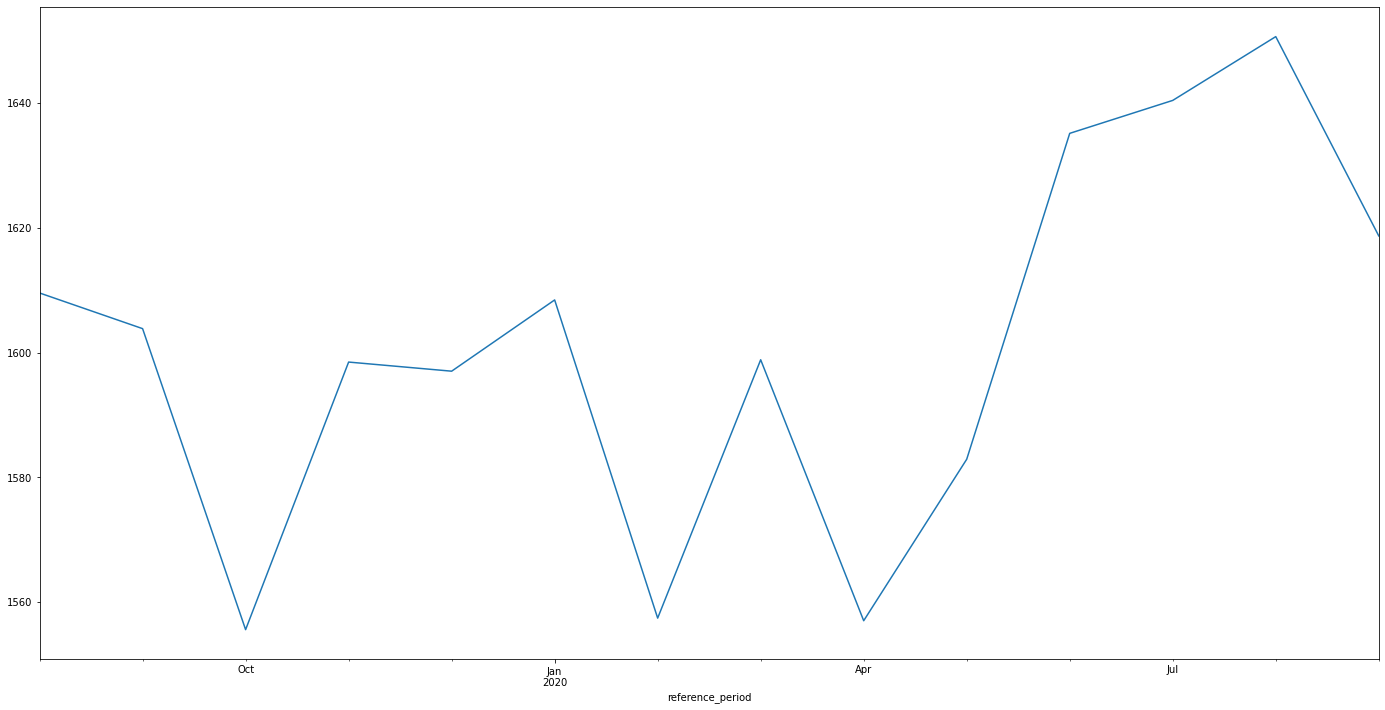

In [12]:
graphing_interest_df = filtered_interest_df.groupby(['reference_period'])['unit_price_psf'].mean()
graphing_interest_df
graphing_interest_df.plot(figsize=(24,12))

In [29]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
combined_df[combined_df['postal_district'] == 26].sort_values(['project_name', 'unit_price_psf'])

,project_name,street_name,type,postal_district,market_segment,tenure,type_of_sale,num_units,price,nett_price,area_sqft,type_of_area,floor_level,unit_price_psf,date_of_sale
53864,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1107000,-,1259,Strata,01 to 05,879,2017-03-31
53842,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1100000,-,1238,Strata,06 to 10,889,2017-05-31
53795,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1700000,-,1873,Strata,11 to 15,908,2017-09-30
53790,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1160000,-,1238,Strata,01 to 05,937,2017-10-31
53781,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1168888,-,1238,Strata,01 to 05,944,2017-10-31
53862,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1190000,-,1259,Strata,06 to 10,945,2017-03-31
53824,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1175000,-,1238,Strata,06 to 10,949,2017-07-31
53857,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,1600000,-,1658,Strata,11 to 15,965,2017-04-30
53814,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,800000,-,807,Strata,01 to 05,991,2017-07-31
53832,BULLION PARK,LENTOR LOOP,Condominium,26,OCR,Freehold,Resale,1,805000,-,807,Strata,06 to 10,997,2017-06-30


In [24]:
df1 = pd.read_csv('data/private_prop_transactions/total_transactions.csv')
sorted(df1['reference_period'].unique())

['2017-04-30',
 '2017-05-31',
 '2017-06-30',
 '2017-07-31',
 '2017-08-31',
 '2017-09-30',
 '2017-10-31',
 '2017-11-30',
 '2017-12-31',
 '2018-01-31',
 '2018-02-28',
 '2018-03-31',
 '2018-04-30',
 '2018-05-31',
 '2018-06-30',
 '2018-07-31',
 '2018-08-31',
 '2018-09-30',
 '2018-10-31',
 '2018-11-30',
 '2018-12-31',
 '2019-01-31',
 '2019-02-28',
 '2019-03-31',
 '2019-04-30',
 '2019-05-31',
 '2019-06-30',
 '2019-07-31',
 '2019-08-31',
 '2019-09-30',
 '2019-10-31',
 '2019-11-30',
 '2019-12-31',
 '2020-01-31',
 '2020-02-29',
 '2020-03-31']

In [27]:
df1.sort_values(['reference_period', 'project'])
df1.drop_duplicates().sort_values(['reference_period', 'project'])

,y,x,street,project,market_segment,area_sqm,area_sqft,price,nett_price,unit_price_psm,unit_price_psf,floor_range,num_units,reference_period,type_of_sale,property_type,district,type_of_area,tenure
25444,34643.794200,31880.644800,WOODSVILLE CLOSE,18 WOODSVILLE,RCR,117.0,1259.377519,1500000.0,NaN,12820.512821,1191.064615,11-15,1.0,2017-04-30,3,Apartment,13,Strata,Freehold
48762,37034.371803,28242.962200,UPPER THOMSON ROAD,183 LONGHAUS,RCR,88.0,947.224117,1515200.0,NaN,17218.181818,1599.621434,01-05,1.0,2017-04-30,1,Apartment,20,Strata,Freehold
76327,37034.371803,28242.962200,UPPER THOMSON ROAD,183 LONGHAUS,RCR,88.0,947.224117,1515200.0,NaN,17218.181818,1599.621434,01-05,1.0,2017-04-30,1,Apartment,20,Strata,Freehold
14846,33123.703540,28933.676044,NEWTON ROAD,26 NEWTON,CCR,44.0,473.612058,1266878.0,NaN,28792.681818,2674.927670,21-25,1.0,2017-04-30,3,Apartment,11,Strata,Freehold
14860,33123.703540,28933.676044,NEWTON ROAD,26 NEWTON,CCR,44.0,473.612058,1221713.0,NaN,27766.204545,2579.564811,21-25,1.0,2017-04-30,3,Apartment,11,Strata,Freehold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49216,32792.473882,34968.444074,BUTTERWORTH LANE,WORTHINGTON,RCR,90.0,968.751938,1260000.0,NaN,14000.000000,1300.642560,06-10,1.0,2020-03-31,3,Apartment,15,Strata,Freehold
76477,32792.473882,34968.444074,BUTTERWORTH LANE,WORTHINGTON,RCR,90.0,968.751938,1260000.0,NaN,14000.000000,1300.642560,06-10,1.0,2020-03-31,3,Apartment,15,Strata,Freehold
129179,32792.473882,34968.444074,BUTTERWORTH LANE,WORTHINGTON,RCR,90.0,968.751938,1260000.0,NaN,14000.000000,1300.642560,06-10,1.0,2020-03-31,3,Apartment,15,Strata,Freehold
59592,35393.769191,12263.162700,YUNNAN CRESCENT,YUNNAN GARDENS,OCR,236.9,2549.970378,2420000.0,NaN,10215.280709,949.030632,-,1.0,2020-03-31,3,Terrace,22,Land,Freehold


In [9]:
combined_df

,y,x,street,project,market_segment,area_sqm,area_sqft,price,nett_price,unit_price_psm,unit_price_psf,floor_range,num_units,reference_period,type_of_sale,property_type,district,type_of_area,tenure,observation_time
3,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,348.0,3745.840826,4400000.0,NaN,12643.678161,1174.636138,06-10,1,2018-09-30,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
4,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,224.0,2411.115934,3600000.0,NaN,16071.428571,1493.084571,01-05,1,2018-03-31,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
5,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,226.0,2432.643755,3450000.0,NaN,15265.486726,1418.210123,01-05,1,2019-02-28,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
6,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,223.0,2400.352024,3580000.0,NaN,16053.811659,1491.447906,01-05,1,2018-01-31,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
7,25005.804519,28384.068816,COVE DRIVE,TURQUOISE,CCR,224.0,2411.115934,3700000.0,NaN,16517.857143,1534.559142,01-05,1,2017-11-30,Resale,Condominium,4,Strata,2007,2020-04-11 15:24:53.293101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75900,31356.695820,33639.595020,TANJONG RHU ROAD,EMERALD EAST,RCR,191.0,2055.906890,2750000.0,NaN,14397.905759,1337.609214,11-15,1,2020-08-31,Resale,Apartment,15,Strata,Freehold,2020-08-14 22:16:20.640487
75916,NaN,NaN,JALAN REMAJA,MONT BOTANIK RESIDENCE,OCR,72.0,775.001550,1286800.0,NaN,17872.222222,1660.383775,06-10,1,2020-08-31,New Sale,Condominium,23,Strata,Freehold,2020-08-14 22:16:20.640487
75917,NaN,NaN,JALAN REMAJA,MONT BOTANIK RESIDENCE,OCR,72.0,775.001550,1301900.0,NaN,18081.944444,1679.867607,06-10,1,2020-08-31,New Sale,Condominium,23,Strata,Freehold,2020-08-14 22:16:20.640487
75920,38094.331319,20479.045553,HILLVIEW AVENUE,HILLVIEW HEIGHTS,OCR,113.0,1216.321877,1500000.0,NaN,13274.336283,1233.226194,01-05,1,2020-08-31,Resale,Condominium,23,Strata,Freehold,2020-08-14 22:16:20.640487
